In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn import preprocessing
%matplotlib inline

## Step 1: Dataset Selection

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [4]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


## Step 2: Scenario/About Dataset

We are working in a famous music-streaming company and our goal is to determine the type of music the customer is listening to. In the future this could help to create algorithm of recommendations based on the likes of the auditor.

So based on the multiple features such as the popularity, acousticness or tempo, we have to be able to classify any other music in one of the genres. This is why this project is about classification because we have several genres and it can not be clustering cause we already know the genres and we do not want to discover knew under-genres. Moreover, this is not regression because genres are not numbers there are categories.

## Step 3: Data Loading


The dataset was taken from Purushottam Malgin on kaggle.com and is composed of 17,9965 rows and 178 columns, and all these musics are classified in11 genres : Rock, Indie, Alt, Pop, Metal, HipHop, Blues, Acoustic/Folk, Instrumental, Country, Bollywood.

The main attributes are numerical attributes such as energy, tempo or popularity and string attributes such as the artist n and the track nameode.

P.S : Valence is the fact that the music is positive, happy ...

## Step 4: Data Wrangling or Data Pre-processing

### Label to string for music class
Yeah its practical to have it directrly as class but what is it ?

In [6]:
result = df[df["Class"] != 10]
result

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.5640,1.0,-4.964,1,0.0485,0.01710,NaN,0.0849,0.899,134.071,234596.0,4,5
2,The Raincoats,No Side to Fall In,35.0,0.434,0.6140,6.0,-8.334,1,0.0525,0.48600,0.000196,0.3940,0.787,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.5970,10.0,-6.528,0,0.0555,0.02120,NaN,0.1220,0.569,107.033,173968.0,4,5
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.9770,6.0,0.878,1,0.1070,0.00353,0.006040,0.1720,0.241,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.6580,5.0,-9.647,0,0.1040,0.40400,0.000001,0.0981,0.677,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17990,Henrik Lindstrand,Hallonlandet,26.0,0.468,0.0835,2.0,-25.131,1,0.0411,0.95000,0.902000,0.1080,0.142,102.340,194059.0,4,1
17991,Green-House,Find Home,35.0,0.166,0.1090,7.0,-17.100,0,0.0413,0.99300,0.824000,0.0984,0.177,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.2230,11.0,-10.174,0,0.0329,0.85800,0.000016,0.0705,0.335,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.9810,4.0,-4.683,0,0.0712,0.00003,0.000136,0.6660,0.262,105.000,216222.0,4,8


In [7]:
class_mapping = {
    0: "Acoustic/Folk", #yes
    1: "Rock", #yes
    2: "Blues", #yes
    3: "Bolywood",#yes
    4: "Country", #yes
    5: "HipHop", #yes
    6: "Alt", #yes
    7: "Instrumental", #yes
    8: "Metal", #yes
    9: "Pop", #yes
    10: "Indie" #yes
}

class_string = df["class"].map(class_mapping)
class_string

df["class_string"] = class_string

KeyError: 'class'

### Column name handling
One important thing is to edit column name to to pass from for example "Artist Name" to "Artiste_Name"

In [ ]:
print("Original column names = ", df.columns)

df.columns= df.columns.str.replace(" ","_").str.lower()
print("Column names after conversion = ", df.columns)

Original column names =  Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class', 'class_string'],
      dtype='object')
Column names after conversion =  Index(['artist_name', 'track_name', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in_min/ms', 'time_signature', 'class', 'class_string'],
      dtype='object')


### Music time handling

In the colum duration some data are given in minutes and some in millisecond. To have all the data in the same scale we pass every durations in minutes.


In [ ]:
df.loc[(df['duration_in_min/ms'] < 30)]['duration_in_min/ms']

7        3.105783
10       4.330450
13       4.440250
25       4.015633
34       3.503783
           ...   
17952    5.407783
17959    3.686017
17974    3.408667
17986    4.392883
17988    3.787783
Name: duration_in_min/ms, Length: 2580, dtype: float64

We have now resolve the issues of durations. We also change the column name to feat the column state 



### Handle missing values

In [ ]:
df.loc[:, :] = df.replace('?', np.nan)
missing_data = df.isnull()
missing_data[0:10]

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,class,class_string
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

artist_name
artist_name
False    17996
Name: count, dtype: int64

track_name
track_name
False    17996
Name: count, dtype: int64

popularity
popularity
False    17568
True       428
Name: count, dtype: int64

danceability
danceability
False    17996
Name: count, dtype: int64

energy
energy
False    17996
Name: count, dtype: int64

key
key
False    15982
True      2014
Name: count, dtype: int64

loudness
loudness
False    17996
Name: count, dtype: int64

mode
mode
False    17996
Name: count, dtype: int64

speechiness
speechiness
False    17996
Name: count, dtype: int64

acousticness
acousticness
False    17996
Name: count, dtype: int64

instrumentalness
instrumentalness
False    13619
True      4377
Name: count, dtype: int64

liveness
liveness
False    17996
Name: count, dtype: int64

valence
valence
False    17996
Name: count, dtype: int64

tempo
tempo
False    17996
Name: count, dtype: int64

duration_in_min/ms
duration_in_min/ms
False    17996
Name: count, dtype: int64

time_signatur

Popularity : 428 
key : 2014
instrumentalness : 4377

In [ ]:
avg_popularity = df["popularity"].astype("float").mean(axis=0)
print(avg_popularity)

44.51212431693989


In [ ]:
df.loc[df['popularity'].isna(), 'popularity'] = avg_popularity

In [ ]:
df.loc[df['key'].isna(), 'key'] = df['key'].value_counts().idxmax()
df.loc[df['instrumentalness'].isna(), 'instrumentalness'] = df['instrumentalness'].value_counts().idxmax()

In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

artist_name
artist_name
False    17996
Name: count, dtype: int64

track_name
track_name
False    17996
Name: count, dtype: int64

popularity
popularity
False    17568
True       428
Name: count, dtype: int64

danceability
danceability
False    17996
Name: count, dtype: int64

energy
energy
False    17996
Name: count, dtype: int64

key
key
False    15982
True      2014
Name: count, dtype: int64

loudness
loudness
False    17996
Name: count, dtype: int64

mode
mode
False    17996
Name: count, dtype: int64

speechiness
speechiness
False    17996
Name: count, dtype: int64

acousticness
acousticness
False    17996
Name: count, dtype: int64

instrumentalness
instrumentalness
False    13619
True      4377
Name: count, dtype: int64

liveness
liveness
False    17996
Name: count, dtype: int64

valence
valence
False    17996
Name: count, dtype: int64

tempo
tempo
False    17996
Name: count, dtype: int64

duration_in_min/ms
duration_in_min/ms
False    17996
Name: count, dtype: int64

time_signatur

### Change the data types

In [ ]:
df.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_name         17996 non-null  object 
 1   track_name          17996 non-null  object 
 2   popularity          17996 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 17996 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    17996 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in_min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  clas

In [ ]:
df['mode'] = df['mode'].astype(float)
df['time_signature'] = df['time_signature'].astype(float)
df['class'] = df['class'].astype(float)
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_name         17996 non-null  object 
 1   track_name          17996 non-null  object 
 2   popularity          17996 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 17996 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  float64
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    17996 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in_min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  float64
 16  clas

### Encode Artist Name and Track Name

In [ ]:
df["artist_name"].value_counts()

artist_name
Backstreet Boys                                                               69
Westlife                                                                      60
Britney Spears                                                                54
Eyal Golan                                                                    48
Omer Adam                                                                     48
                                                                              ..
Richard Hawley                                                                 1
Gabriel Fauré, Henri Büsser, Ina-Esther Joost Ben-Sasson, Allan Sternfield     1
Ilaiyaraaja, K. J. Yesudas                                                     1
Blaenavon                                                                      1
The Lazy Jesus                                                                 1
Name: count, Length: 9149, dtype: int64

In [ ]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,artist_name,track_name,class_string
0,Bruno Mars,That's What I Like (feat. Gucci Mane),HipHop
1,Boston,Hitch a Ride,Bollywood
2,The Raincoats,No Side to Fall In,Alt
3,Deno,Lingo (feat. J.I & Chunkz),HipHop
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,Bollywood


There is no duplicated value in the data. 

In [ ]:
obj_df["artist_name"] = obj_df["artist_name"].astype('category')
obj_df.dtypes

obj_df["artist_name_cat"] = obj_df["artist_name"].cat.codes
obj_df.head()

obj_df.loc[obj_df['artist_name'] == "Bruno Mars"]


,artist_name,track_name,class_string,artist_name_cat
0,Bruno Mars,That's What I Like (feat. Gucci Mane),HipHop,1182
2742,Bruno Mars,Talking to the Moon,Blues,1182
13085,Bruno Mars,Marry You,Blues,1182
16996,Bruno Mars,Just The Way You Are,Blues,1182


In [ ]:
obj_df["track_name"] = obj_df["track_name"].astype('category')
obj_df.dtypes

obj_df["track_name_cat"] = obj_df["track_name"].cat.codes
obj_df.head()

obj_df.loc[obj_df['track_name_cat'] == 0]

,artist_name,track_name,class_string,artist_name_cat,track_name_cat
2089,The Gaslight Anthem,"""45""",Bollywood,7716,0


In [ ]:
obj_df.head()

,artist_name,track_name,class_string,artist_name_cat,track_name_cat
0,Bruno Mars,That's What I Like (feat. Gucci Mane),HipHop,1182,11406
1,Boston,Hitch a Ride,Bollywood,1092,4988
2,The Raincoats,No Side to Fall In,Alt,7899,8144
3,Deno,Lingo (feat. J.I & Chunkz),HipHop,1987,6753
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,Bollywood,6283,8167


In [ ]:
df["artist_name_cat"] = obj_df["artist_name_cat"]
df["track_name_cat"] = obj_df["track_name_cat"]

df['artist_name_cat'] = df['artist_name_cat'].astype(float)
df['track_name_cat'] = df['track_name_cat'].astype(float)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_name         17996 non-null  object 
 1   track_name          17996 non-null  object 
 2   popularity          17996 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 17996 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  float64
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    17996 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in_min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  float64
 16  clas

### Duplicated rows handling

In [ ]:
duplicateRows = df[df.duplicated(subset = df.columns.difference(['artist_name']))]

print(duplicateRows)

Empty DataFrame
Columns: [artist_name, track_name, popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_in_min/ms, time_signature, class, class_string, artist_name_cat, track_name_cat]
Index: []


We can see that we get 2580 data given in minutes.

In [ ]:
condition = df['duration_in_min/ms'] < 30 
# If the value in duration_in_min/ms column is less than 30, then multiply the value with 60,000
df.loc[condition,'duration_in_min/ms'] = df.loc[condition,'duration_in_min/ms']*60000

df.loc[(df['duration_in_min/ms'] < 30)]['duration_in_min/ms']

df.rename(columns={"duration_in_min/ms": "duration_in_ms"})

,artist_name,track_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_ms,time_signature,class,class_string,artist_name_cat,track_name_cat
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1.0,0.0485,0.017100,0.000109,0.0849,0.8990,134.071,234596.0,4.0,5.0,HipHop,1182.0,11406.0
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1.0,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4.0,10.0,Bollywood,1092.0,4988.0
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1.0,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4.0,6.0,Alt,7899.0,8144.0
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0.0,0.0555,0.021200,0.000109,0.1220,0.5690,107.033,173968.0,4.0,5.0,HipHop,1987.0,6753.0
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1.0,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4.0,10.0,Bollywood,6283.0,8167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0.0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3.0,6.0,Alt,3042.0,3796.0
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0.0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4.0,2.0,Indie,5122.0,476.0
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0.0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4.0,8.0,Metal,7032.0,8769.0
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0.0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4.0,8.0,Metal,797.0,9743.0


## Step 5: Exploratory Data Analysis

# Split train and test

##### first we setp up X and y for spliting train and test table

In [ ]:
X = df[['popularity', 'danceability', 'energy',
'key', 'loudness', 'mode', 'speechiness', 'acousticness',
'instrumentalness', 'liveness', 'valence', 'tempo',
'duration_in_min/ms', 'time_signature', 'artist_name_cat',
'track_name_cat']].values


y = df['class'].values

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape, "   ", y_train.shape)
print ('Test set:', X_test.shape, "   ", y_test.shape)


Train set: (14396, 16)     (14396,)
Test set: (3600, 16)     (3600,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 100
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
mean_acc

array([0.31305556, 0.29333333, 0.31416667, 0.34916667, 0.36722222,
       0.37694444, 0.38361111, 0.39472222, 0.41222222, 0.41222222,
       0.41916667, 0.42194444, 0.42333333, 0.42638889, 0.43611111,
       0.44      , 0.43972222, 0.4375    , 0.43944444, 0.43861111,
       0.44      , 0.44027778, 0.44194444, 0.44388889, 0.44416667,
       0.44111111, 0.44166667, 0.44083333, 0.44361111, 0.44138889,
       0.44444444, 0.44638889, 0.4425    , 0.44444444, 0.44666667,
       0.44583333, 0.44805556, 0.44722222, 0.44472222, 0.44611111,
       0.44666667, 0.44805556, 0.44944444, 0.44777778, 0.44916667,
       0.44944444, 0.45111111, 0.45      , 0.45      , 0.45      ,
       0.45027778, 0.45027778, 0.45083333, 0.45222222, 0.44916667,
       0.44777778, 0.44888889, 0.45055556, 0.44888889, 0.44861111,
       0.44777778, 0.44805556, 0.44916667, 0.4475    , 0.44972222,
       0.44888889, 0.45      , 0.44916667, 0.44805556, 0.44944444,
       0.4475    , 0.45027778, 0.44861111, 0.44972222, 0.44916

# Manhattan or Euclidean ? 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'n_neighbors': range(1, 20), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Perform grid search
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best parameters
print(grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}


According to the calculation done in the GridSearchCV using cross validation with multiple parameters giver, we should use Manhatan distance without weighted and using k=19 

##### But make sure of that using elbow method to compare error rate for each distance metrics and to find K

Euclidean

<Figure size 800x600 with 0 Axes>

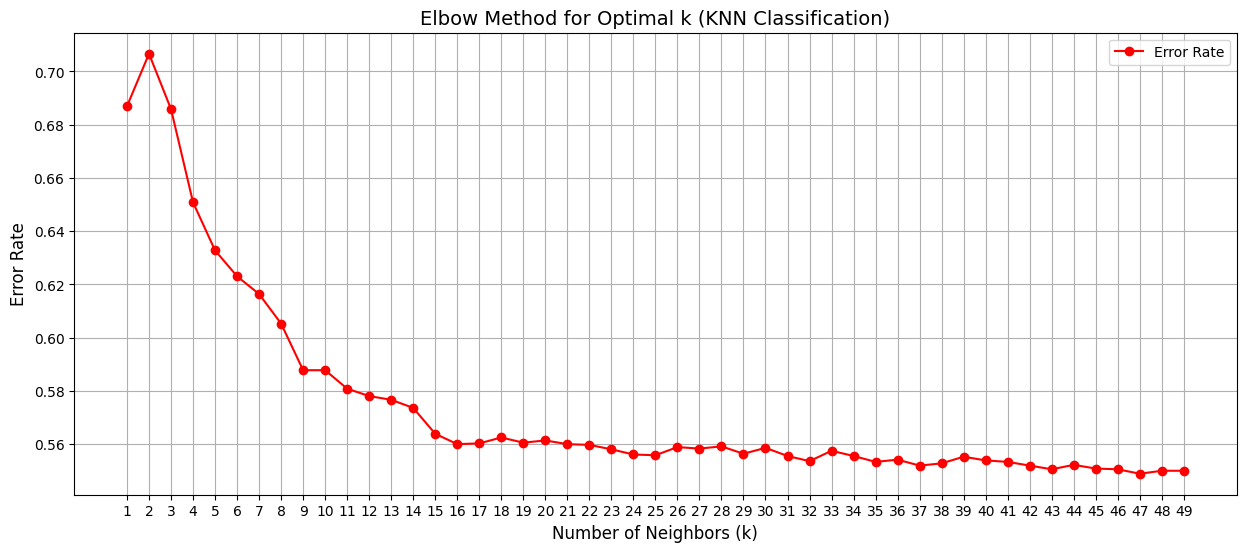

In [ ]:
from sklearn.metrics import accuracy_score

k_values = range(1, 50)  # Test k from 1 to 30
error_rates = []  # List to store error rate for each k

# Calculate error rate for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)  # Error rate is 1 - accuracy
    error_rates.append(error_rate)

# Plot the elbow curve
plt.figure(figsize=(15, 6))
plt.plot(k_values, error_rates, marker='o', color='red', label='Error Rate')
plt.title('Elbow Method for Optimal k (KNN Classification)', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.xticks(k_values)
plt.grid()
plt.legend()
plt.show()

Manhattan

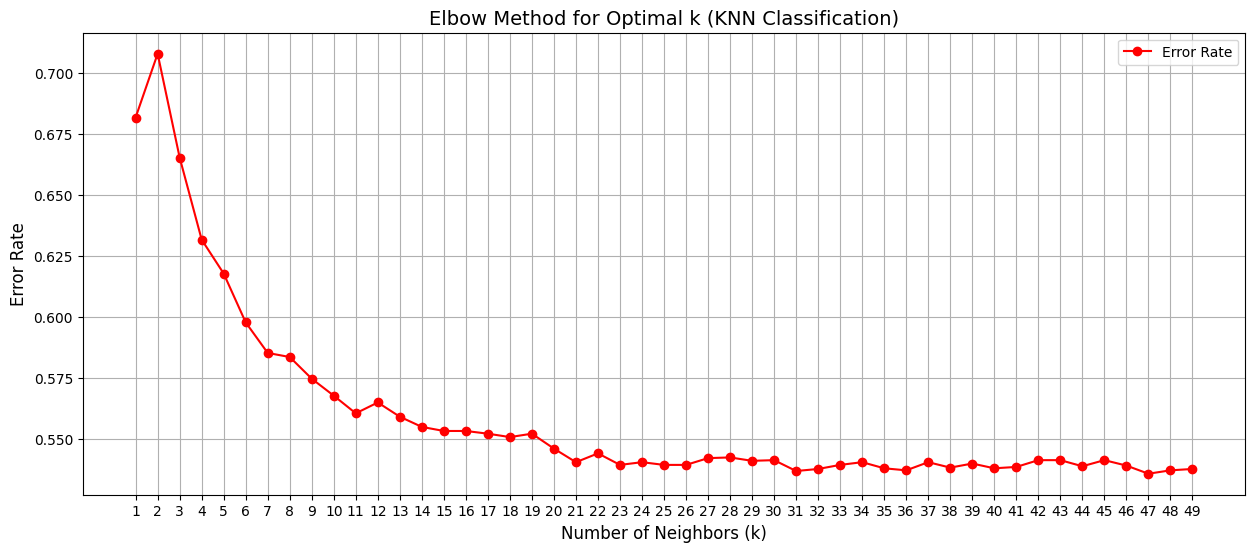

In [ ]:
from sklearn.metrics import accuracy_score

k_values = range(1, 50)  # Test k from 1 to 30
error_rates = []  # List to store error rate for each k

# Calculate error rate for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)  # Error rate is 1 - accuracy
    error_rates.append(error_rate)

# Plot the elbow curve
plt.figure(figsize=(15, 6))
plt.plot(k_values, error_rates, marker='o', color='red', label='Error Rate')
plt.title('Elbow Method for Optimal k (KNN Classification)', fontsize=14)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.xticks(k_values)
plt.grid()
plt.legend()
plt.show()

#### Effectively Manhattan look to be better with less error rate (not that much but it confirm the previous calculation). We can agreed with the calculation that 19 is good K but 21 is good too. 

## KNN Algorithm

In [ ]:
knn = KNeighborsClassifier(n_neighbors=21, metric='manhattan' )
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

df_X_test = pd.DataFrame(X_test, columns=['popularity', 'danceability', 'energy',
'key', 'loudness', 'mode', 'speechiness', 'acousticness',
'instrumentalness', 'liveness', 'valence', 'tempo',
'duration_in_min/ms', 'time_signature', 'artist_name_cat',
'track_name_cat'])

df_y_pred = pd.DataFrame(y_pred, columns=['class'])

pd.concat([df_X_test, df_y_pred], axis=1)



,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in_min/ms,time_signature,artist_name_cat,track_name_cat,class
0,2.293412,0.490586,0.642500,0.306973,0.674150,0.755294,-0.167600,-0.740065,-0.487928,-0.239750,0.203138,0.756414,-0.354119,0.210065,-0.237493,-1.176944,10.0
1,-0.203980,1.110084,0.005197,-1.342857,0.584746,0.755294,-0.429644,-0.764113,-0.486453,1.091848,-1.587122,-0.629078,-0.281003,0.210065,0.144983,0.237756,10.0
2,-0.726690,-0.886742,-1.537076,-1.672823,-2.429303,0.755294,-0.587589,2.005380,2.283899,-0.453308,-1.693288,-1.107221,-0.409119,0.210065,-0.750856,-0.016189,7.0
3,0.899519,0.923633,-1.073969,0.306973,-0.305836,0.755294,0.769297,0.530927,2.381998,-0.534962,-0.454678,1.471379,-0.827292,0.210065,-1.387561,0.199895,6.0
4,-0.959006,0.658993,-0.508894,1.626837,0.186874,-1.323988,-0.642630,-0.521151,-0.488305,0.620764,-0.279816,-0.865529,-0.187578,0.210065,-0.318213,1.180581,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,-1.365558,-0.357463,-0.657598,0.636939,-1.108495,0.755294,0.362470,-0.064650,-0.487078,-0.842737,1.547915,-0.694954,4.910981,0.210065,0.249843,0.272153,3.0
3596,-0.436296,0.550732,-0.440915,-0.682925,-0.840777,0.755294,0.056154,0.283038,-0.480585,-0.591493,1.006674,-1.497100,-0.258779,0.210065,0.948408,0.569499,4.0
3597,0.260651,-0.477754,1.088612,-1.672823,1.337024,0.755294,0.374436,-0.785297,-0.486519,-0.264874,0.902589,1.529950,-0.983223,0.210065,0.974057,-0.644585,10.0
3598,0.957598,0.995807,-0.181745,-1.342857,-0.363380,0.755294,-0.546906,0.228310,-0.487928,-0.964591,1.872660,-0.977329,-1.310842,0.210065,1.172839,1.236910,10.0


[[ 37   2   9   1   2   0  13   1   2  24  29]
 [  5   8   7   0   4   7  52   9  10  31 148]
 [ 20   4  70   6   2   2  16   2  12  29  87]
 [  4   1  18  32   1   0   2   3   0  11  13]
 [  6   1   3   0   7   1   5   0   0  10  38]
 [  1   0   3   0   0 184  15   1   6  57  26]
 [ 24   6  17   0   4  16  97  29  28  71 235]
 [  1   0   1   0   0   0   5  92   0   0   4]
 [  0   0   1   0   0   0   6   1 172   7 174]
 [ 15   7  11   2   5  38  30   2   3 263 137]
 [ 18   9  19   2   6  11  62   4  91  82 692]]


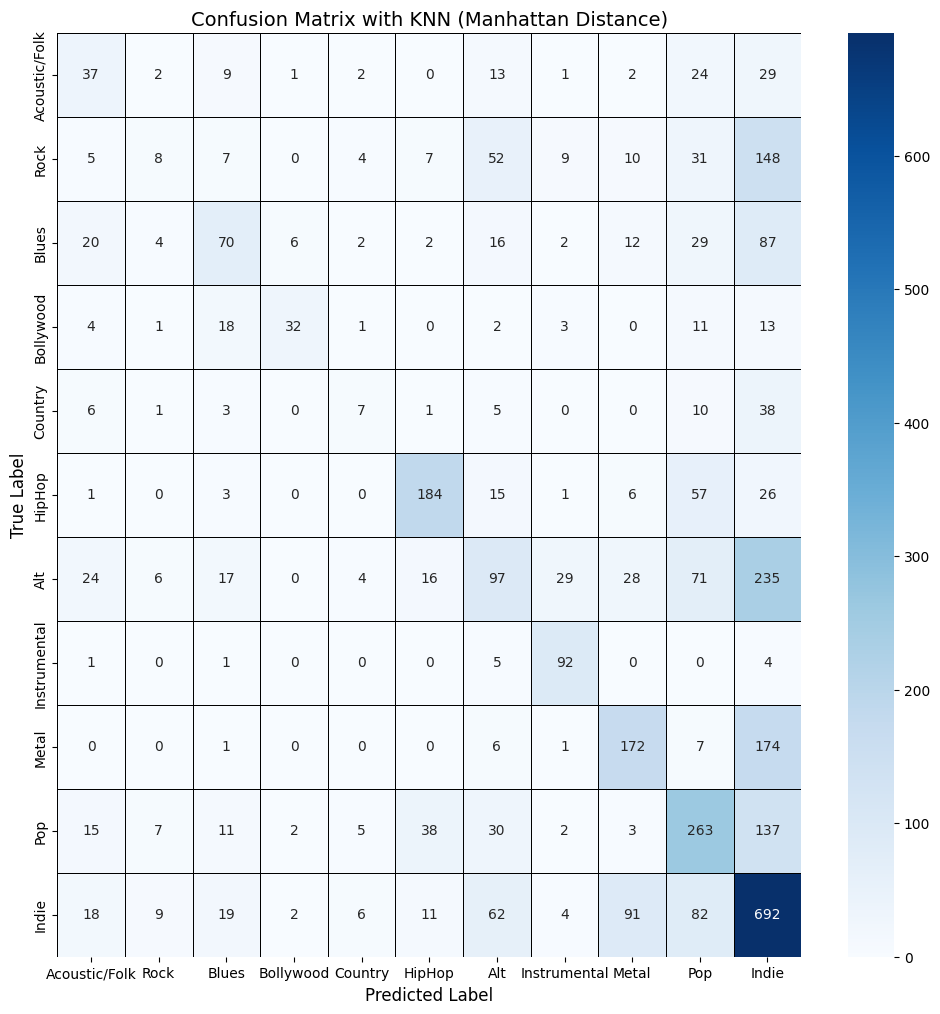

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

class_mapping = [
    "Acoustic/Folk",  # Class 0
    "Rock",           # Class 1
    "Blues",          # Class 2
    "Bollywood",      # Class 3
    "Country",        # Class 4
    "HipHop",         # Class 5
    "Alt",            # Class 6
    "Instrumental",   # Class 7
    "Metal",          # Class 8
    "Pop",            # Class 9
    "Indie"           # Class 10
]

# Load dataset
data = load_iris()

cm = confusion_matrix(y_test, y_pred)

print(cm)
# Plot Confusion Matrix with Seaborn
plt.figure(figsize=(12, 12))

# Create a heatmap with annotations and color palette
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_mapping, yticklabels=class_mapping, 
            cbar=True, linewidths=0.5, linecolor='black')

# Titles and labels
plt.title('Confusion Matrix with KNN (Manhattan Distance)', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Display the plot
plt.xticks(rotation=0) 
plt.show()

## Is this the fault of the test ? 

To check this we will change the random_state in the spliting of train and test to check if the problem is resolved.

[[ 41   2  12   0   0   0  18   1   4  21  24]
 [ 15   8  10   0   1  16  43  12  16  26 159]
 [ 17   3  80   4   2   9  19   7   2  35  95]
 [  6   1  19  37   0   0   1   1   2   9  19]
 [ 10   0   3   0   5   1   3   0   0  17  41]
 [  4   1   7   0   0 159  13   0   4  57  24]
 [ 21  15  26   1   3  18 100  18  28  68 221]
 [  3   0   3   1   0   0   2  91   0   0   1]
 [  0   0   1   0   0   0   9   2 181   2 172]
 [ 25   3  11   3   1  44  26   1   7 244 143]
 [ 21  13  22   2   1   8  47   3 102 105 635]]


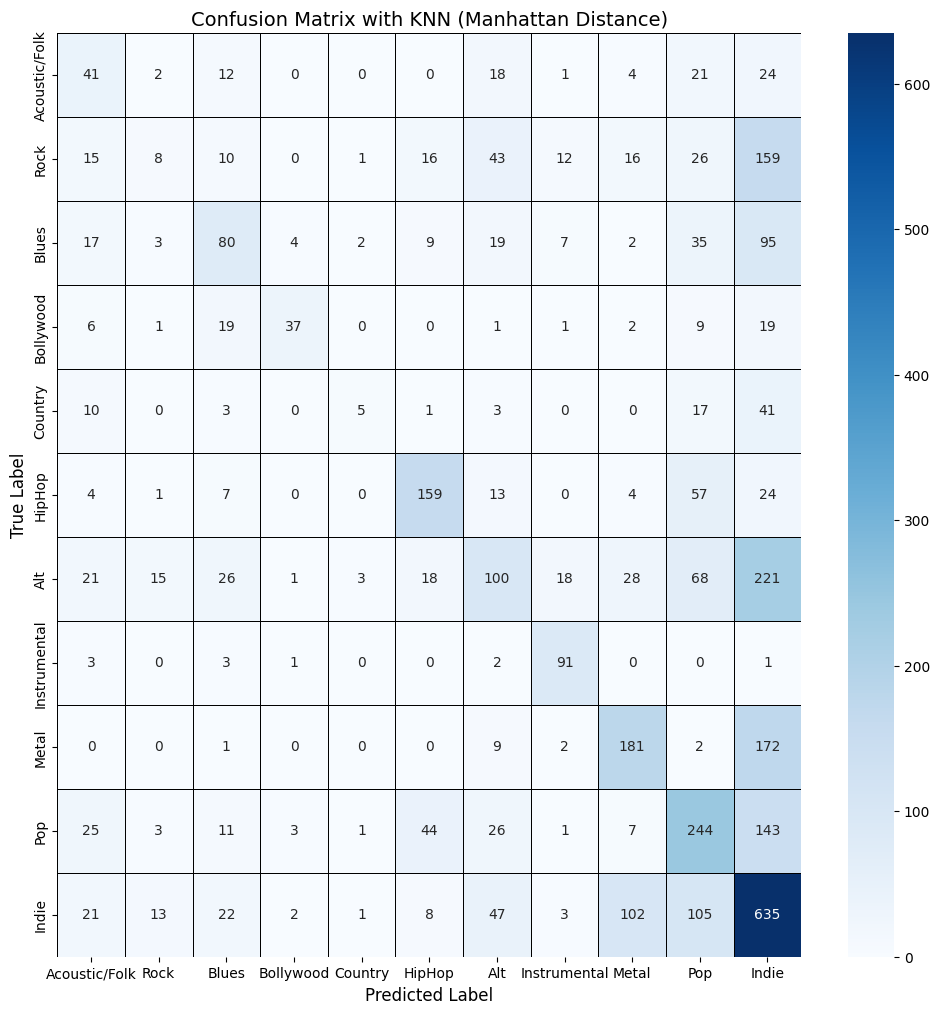

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1055625)

knn = KNeighborsClassifier(n_neighbors=21, metric='manhattan' )
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

df_X_test = pd.DataFrame(X_test, columns=['popularity', 'danceability', 'energy',
'key', 'loudness', 'mode', 'speechiness', 'acousticness',
'instrumentalness', 'liveness', 'valence', 'tempo',
'duration_in_min/ms', 'time_signature', 'artist_name_cat',
'track_name_cat'])

df_y_pred = pd.DataFrame(y_pred, columns=['class'])

pd.concat([df_X_test, df_y_pred], axis=1)


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

class_mapping = [
    "Acoustic/Folk",  # Class 0
    "Rock",           # Class 1
    "Blues",          # Class 2
    "Bollywood",      # Class 3
    "Country",        # Class 4
    "HipHop",         # Class 5
    "Alt",            # Class 6
    "Instrumental",   # Class 7
    "Metal",          # Class 8
    "Pop",            # Class 9
    "Indie"           # Class 10
]

# Load dataset
data = load_iris()

cm = confusion_matrix(y_test, y_pred)

print(cm)
# Plot Confusion Matrix with Seaborn
plt.figure(figsize=(12, 12))

# Create a heatmap with annotations and color palette
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_mapping, yticklabels=class_mapping, 
            cbar=True, linewidths=0.5, linecolor='black')

# Titles and labels
plt.title('Confusion Matrix with KNN (Manhattan Distance)', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Display the plot
plt.xticks(rotation=0) 
plt.show()

We can see than we have the same problem (but not the same value) than in the first confusion matrix

### What if no Indie song ? 


Train set: (10437, 16)     (10437,)
Test set: (2610, 16)     (2610,)
[9. 6. 6. ... 8. 9. 8.]
[[ 44   6  20   0   2   0  13   1   3  23]
 [  9  34  14   0   3  11 118   6  42  39]
 [ 13  10  98   5   3   0  37   4  29  34]
 [  6   3  11  31   0   0   9   4   1  11]
 [  8  13   5   0  12   0  12   0   0  38]
 [  5   2  10   1   0 179  22   2   8  61]
 [ 27  41  32   0   3  19 192  28  74  99]
 [  1   0   8   1   0   0   6  99   0   2]
 [  4  12   4   0   0   0  37   2 298  16]
 [ 27  16  19   2   5  32  73   1  21 334]]


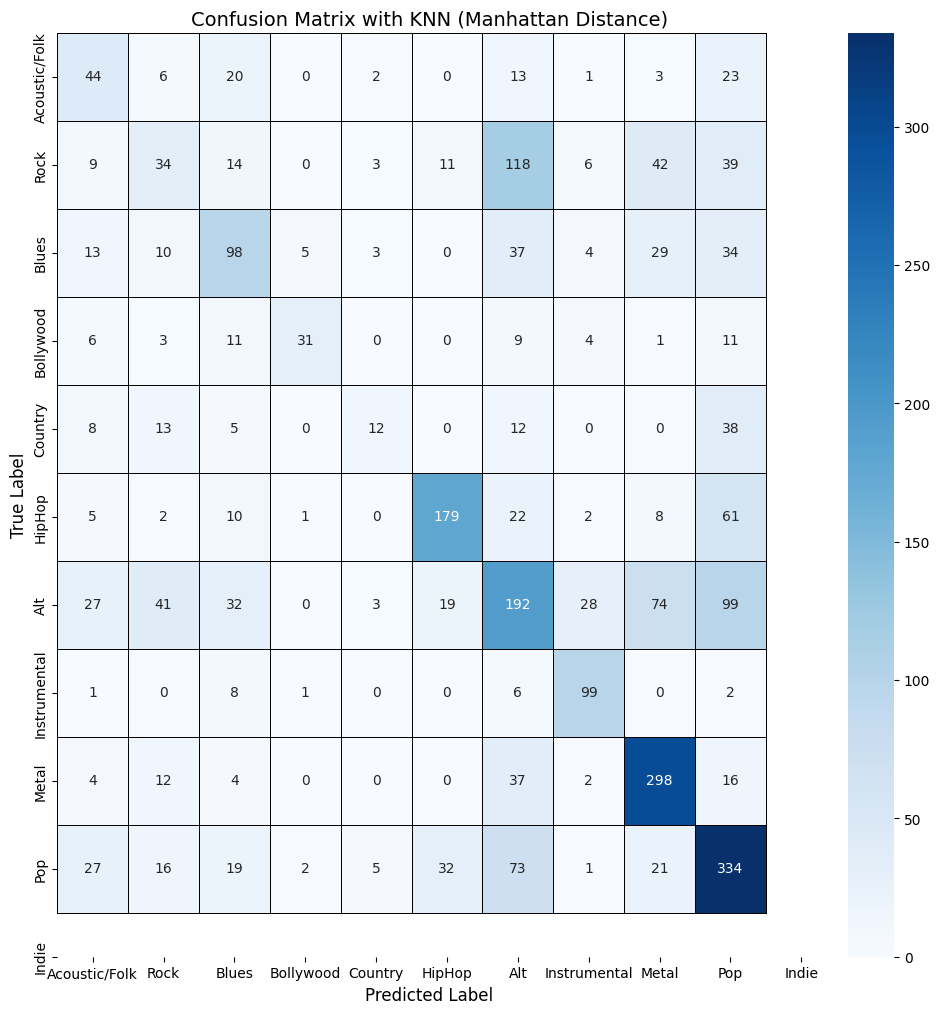

In [ ]:
from sklearn.model_selection import train_test_split
X = df[df["class"] != 10][['popularity', 'danceability', 'energy',
'key', 'loudness', 'mode', 'speechiness', 'acousticness',
'instrumentalness', 'liveness', 'valence', 'tempo',
'duration_in_min/ms', 'time_signature', 'artist_name_cat',
'track_name_cat']].values

y = df[df["class"] != 10]['class'].values

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape, "   ", y_train.shape)
print ('Test set:', X_test.shape, "   ", y_test.shape)

knn = KNeighborsClassifier(n_neighbors=21, metric='manhattan' )
print(y_train)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

df_X_test = pd.DataFrame(X_test, columns=['popularity', 'danceability', 'energy',
'key', 'loudness', 'mode', 'speechiness', 'acousticness',
'instrumentalness', 'liveness', 'valence', 'tempo',
'duration_in_min/ms', 'time_signature', 'artist_name_cat',
'track_name_cat'])

df_y_pred = pd.DataFrame(y_pred, columns=['class'])

pd.concat([df_X_test, df_y_pred], axis=1)


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

class_mapping = [
    "Acoustic/Folk",  # Class 0
    "Rock",           # Class 1
    "Blues",          # Class 2
    "Bollywood",      # Class 3
    "Country",        # Class 4
    "HipHop",         # Class 5
    "Alt",            # Class 6
    "Instrumental",   # Class 7
    "Metal",          # Class 8
    "Pop",            # Class 9
    "Indie"           # Class 10
]

# Load dataset
data = load_iris()

cm = confusion_matrix(y_test, y_pred)

print(cm)
# Plot Confusion Matrix with Seaborn
plt.figure(figsize=(12, 12))

# Create a heatmap with annotations and color palette
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_mapping, yticklabels=class_mapping, 
            cbar=True, linewidths=0.5, linecolor='black')

# Titles and labels
plt.title('Confusion Matrix with KNN (Manhattan Distance)', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Display the plot
plt.xticks(rotation=0) 
plt.show()

We delete the indie songs and we can see than the confusion matrix is more coherent in the diagonal. We continue to have some problems within the matrix but values are more well predicted.